In [36]:
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import hp, fmin, tpe, Trials, pyll
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [6]:
def black_box(args):
    x1 = args[0]
    x2 = args[1]
    a = 3
    b = 100
    return (a - x1)**2 + b*(x2 - x1**2)**2

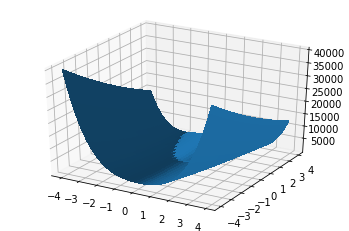

In [7]:
x1 = np.arange(-4, 4, 0.1)
x2 = np.arange(-4, 4, 0.1)

x1, x2 = np.meshgrid(x1, x2)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x1, x2, black_box([x1, x2]),
                       linewidth=0, antialiased=False)

plt.show()

In [40]:
trials = Trials()
sspace = [hp.uniform('x1', -100, 100), 
          hp.uniform('x2', -100, 100)]    

(19.070822549060097, 19.362348660455268)

In [32]:
best = fmin(black_box,
    space=sspace,    
    algo=tpe.suggest,
    max_evals=750,
    trials=trials)

print(best)

{'x1': 4.4096181859317, 'x2': 20.199991615320627}


In [33]:
trials

In [ ]:
losses = []
vals = []
for t in trials.trials:
    losses.append(t['result']['loss'])
    vals.append(t['misc']['vals']['x1'])

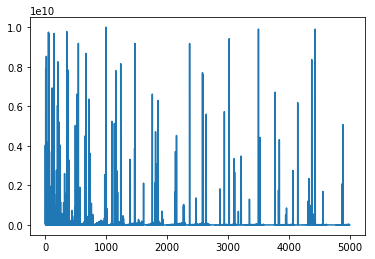

In [36]:
plt.plot(losses)

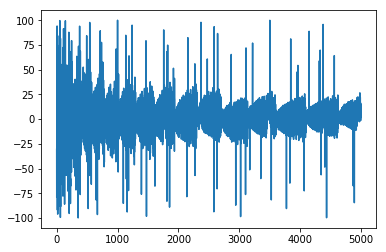

In [37]:
plt.plot(vals)

In [53]:
space = hp.choice('policy', [
    {'type':'Invert', 
     'Proba':hp.uniform('invert_proba', 0, 1), 
     'Mag':hp.uniform('invert_mag', 0, 0)},
    {'type':'Rotate', 
     'Proba':hp.uniform('rotate_proba', 0, 1), 
     'Mag':hp.uniform('rotate_mag', 0, 25)},
    {'type':'Sharpness', 
     'Proba':hp.uniform('sharp_proba', 0, 1), 
     'Mag':hp.uniform('sharp_mag', 0, 25)}
])

In [65]:
for i in range(10):
    print(pyll.stochastic.sample(space))

{'Mag': 4.792149098496612, 'Proba': 0.16190404581497353, 'type': 'Rotate'}
{'Mag': 18.53977670897281, 'Proba': 0.4211448597658648, 'type': 'Sharpness'}
{'Mag': 20.084306532528135, 'Proba': 0.7524369455535233, 'type': 'Rotate'}
{'Mag': 0.0, 'Proba': 0.5241190372226482, 'type': 'Invert'}
{'Mag': 24.094627210630915, 'Proba': 0.9824892439432469, 'type': 'Rotate'}
{'Mag': 0.0, 'Proba': 0.9397048857412241, 'type': 'Invert'}
{'Mag': 3.064688339964303, 'Proba': 0.24666832428439356, 'type': 'Sharpness'}
{'Mag': 0.0, 'Proba': 0.02643796155390199, 'type': 'Invert'}
{'Mag': 0.0, 'Proba': 0.701531039870995, 'type': 'Invert'}
{'Mag': 0.0, 'Proba': 0.8086447875216529, 'type': 'Invert'}
